
Training Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.72      1.00      0.84       145

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200

ROC-AUC Score: 0.50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


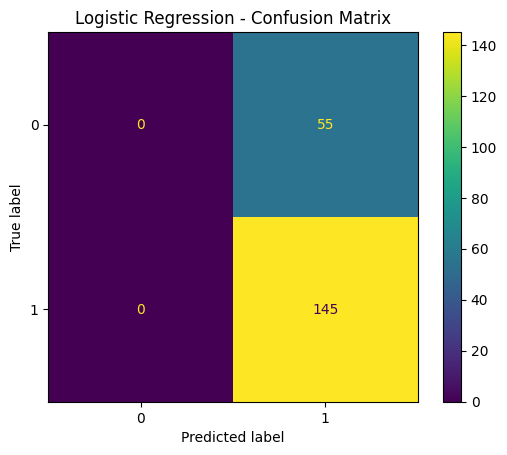

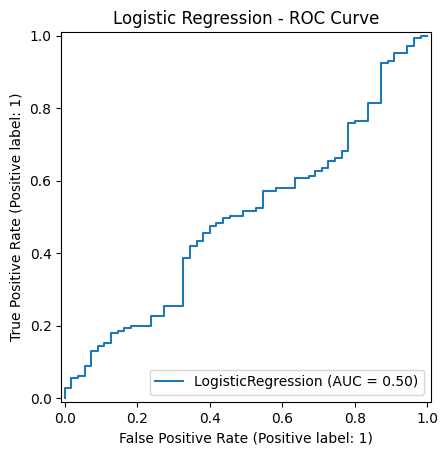


Training Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.28      0.35      0.31        55
           1       0.73      0.67      0.70       145

    accuracy                           0.58       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.61      0.58      0.59       200

ROC-AUC Score: 0.51


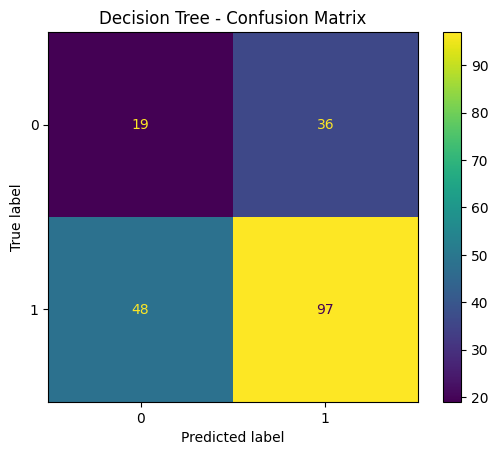

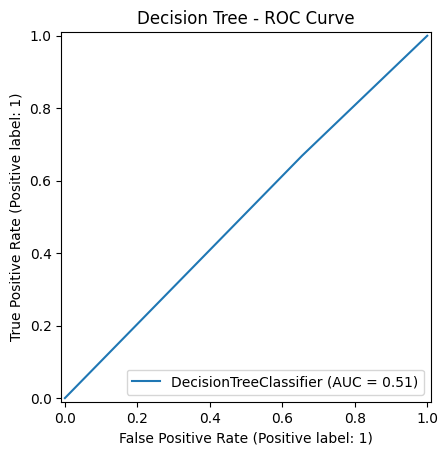


Training Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.45      0.09      0.15        55
           1       0.74      0.96      0.83       145

    accuracy                           0.72       200
   macro avg       0.59      0.52      0.49       200
weighted avg       0.66      0.72      0.65       200

ROC-AUC Score: 0.52


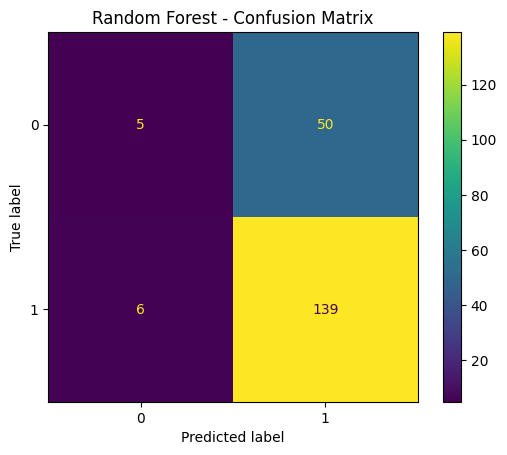

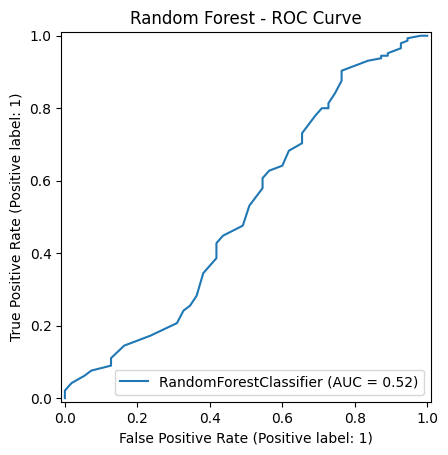

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

np.random.seed(42)
n = 1000

data = pd.DataFrame({
    'income': np.random.normal(50000, 15000, n).astype(int),
    'debt': np.random.normal(15000, 5000, n).astype(int),
    'credit_history_years': np.random.randint(1, 20, n),
    'late_payments': np.random.randint(0, 5, n),
    'loan_amount': np.random.normal(10000, 3000, n).astype(int),
    'employment_status': np.random.choice(['Employed', 'Self-employed', 'Unemployed'], n, p=[0.6, 0.3, 0.1]),
    'creditworthy': np.random.choice([1, 0], n, p=[0.7, 0.3])
})

data['debt_to_income'] = data['debt'] / data['income']
data = pd.get_dummies(data, columns=['employment_status'], drop_first=True)

X = data.drop('creditworthy', axis=1)
y = data['creditworthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    roc_score = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    print(f"ROC-AUC Score: {roc_score:.2f}")


    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(f'{name} - Confusion Matrix')
    plt.show()


    RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(f'{name} - ROC Curve')
    plt.show()
